# Logistic Regression

problem statement :

 Build a machine learning model to predict whether a person makes over 50K a year or not
        https://drive.google.com/open?id=1XVi34snXnh6qW2u71jwc05oCRnpOXoWF

In [1]:
#importing necessary libraries

#importing pandas library to handel dataset
import pandas as pd
#importing numpy library for faster matrix calculations
import numpy as np
#importing matplotlib for plotting data graphs
import matplotlib.pyplot as plt
#importing seaborn advanced plotting library
import seaborn as sns

#loading data set
data_set = pd.read_csv('classification_2.csv',names=[
"Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
"Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
"Hours per week", "Country", "Target"])
data_set.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### data pre-processing

In [48]:
data_set.describe()

,Workclass,Education,Marital Status,Occupation,Capital Gain,Capital Loss,Country,Target
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,4.868892,11.298210,3.611836,7.572740,9.892234,9.799578,37.718866,0.759190
std,1.455960,3.870264,1.506222,4.228857,0.738537,0.925069,7.823782,0.427581
min,1.000000,1.000000,1.000000,1.000000,-0.000000,-0.000000,1.000000,0.000000
25%,5.000000,10.000000,3.000000,4.000000,10.000000,10.000000,40.000000,1.000000
50%,5.000000,12.000000,3.000000,8.000000,10.000000,10.000000,40.000000,1.000000
75%,5.000000,13.000000,5.000000,11.000000,10.000000,10.000000,40.000000,1.000000
max,9.000000,16.000000,7.000000,15.000000,10.000000,10.000000,42.000000,1.000000


In [2]:
#checking for list of columns present in data set
data_set.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [3]:
# #assigning numerical values in our target variable columns
data_set.Target.replace([' <=50K',' >50K'],[1,0], inplace=True)
data_set.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [4]:
#checking catagories in our target variable column and their sependency on other columns
data_set.groupby('Target').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
Target,,,,,,
0,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026
1,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210


In [5]:
#checking dependency of target column on workclass column <<<note only target column mean>>
data_set.groupby('Workclass').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Workclass,,,,,,,
?,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390,0.895969
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167,0.613542
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800,0.705208
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571,1.000000
Private,36.797585,192764.114734,9.879714,889.217792,80.008724,40.267096,0.781327
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100,0.442652
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881,0.715073
State-gov,39.436055,184136.613251,11.375963,701.699538,83.256549,39.031587,0.728043
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286,1.000000


In [6]:
#checking dependency of target column on education column <<<note only target column mean>>
data_set.groupby('Education').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Education,,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519,0.933548
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957,0.948936
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600,0.923788
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952,0.964286
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898,0.951952
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873,0.938080
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747,0.947471
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217,0.751640
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709,0.738784


In [7]:
#checking dependency of target column on marital status column <<<note only target column mean>>
data_set.groupby('Marital Status').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Marital Status,,,,,,,
Divorced,43.041639,185802.790457,10.030385,728.414810,64.600720,41.246680,0.895791
Married-AF-spouse,32.478261,188165.565217,10.173913,432.652174,0.000000,41.130435,0.565217
Married-civ-spouse,43.247596,186763.172877,10.320646,1764.859509,122.439103,43.284856,0.553152
Married-spouse-absent,40.578947,193141.760766,9.308612,653.983254,57.779904,39.669856,0.918660
Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998,0.954039
Separated,39.354146,206444.325854,9.293659,535.568780,58.110244,39.301463,0.935610
Widowed,58.975831,174159.042296,9.093656,571.071501,79.666667,32.979859,0.914401


In [8]:
#checking dependency of target column on occupation column <<<note only target column mean>>
data_set.groupby('Occupation').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Occupation,,,,,,,
?,40.882800,188658.667390,9.253391,604.491047,60.529571,31.906131,0.896365
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355,0.865517
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667,0.888889
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221,0.773359
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703,0.515986
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940,0.884306
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445,0.937226
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744,0.875125
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669,0.958422


In [9]:
#checking dependency of target column on relationship column <<<note only target column mean>>
data_set.groupby('Relationship').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Relationship,,,,,,,
Husband,43.818616,187074.862503,10.326461,1795.062230,124.160919,44.120139,0.551429
Not-in-family,38.346057,191131.795304,10.315593,743.327273,75.390728,40.595665,0.896930
Other-relative,33.164118,205059.821611,8.786952,279.595311,51.332314,37.006116,0.962283
Own-child,24.827940,193175.408840,9.486188,155.655485,39.511839,33.269337,0.986780
Unmarried,40.293964,191128.405688,9.642194,455.031050,41.464887,39.103018,0.936738
Wife,39.846301,181849.507653,10.463010,1659.791454,118.006378,36.861607,0.524872


In [10]:
#checking dependency of target column on race column <<<note only target column mean>>
data_set.groupby('Race').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Race,,,,,,,
Amer-Indian-Eskimo,37.173633,120831.147910,9.311897,625.266881,34.176849,40.048232,0.884244
Asian-Pac-Islander,37.746872,159940.609240,10.960539,1478.358037,97.222329,40.127045,0.734360
Black,37.767926,228013.124200,9.486236,609.940461,60.385083,38.422855,0.876120
Other,33.457565,197124.191882,8.841328,934.660517,61.070111,39.468635,0.907749
White,38.769881,187298.064280,10.135246,1121.660375,90.806155,40.689100,0.744140


In [11]:
#checking dependency of target column on sex column <<<note only target column mean>>
data_set.groupby('Sex').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Sex,,,,,,,
Female,36.858230,185746.311206,10.035744,568.410547,61.187633,36.410361,0.890539
Male,39.433547,191771.449013,10.102891,1329.370078,100.213309,42.428086,0.694263


In [12]:
#checking dependency of target column on country column <<<note only target column mean>>
data_set.groupby('Country').mean()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target
Country,,,,,,,
?,38.725557,193300.897084,10.598628,1806.518010,118.265866,41.512864,0.749571
Cambodia,37.789474,193080.368421,8.789474,1027.842105,183.052632,40.894737,0.631579
Canada,42.545455,179852.933884,10.652893,1504.132231,129.933884,40.404959,0.677686
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667,0.733333
Columbia,39.711864,225149.406780,9.372881,180.610169,27.152542,39.067797,0.966102
Cuba,45.768421,246291.347368,9.600000,367.231579,70.042105,39.157895,0.736842
Dominican-Republic,37.728571,192089.557143,7.114286,1476.057143,25.171429,42.471429,0.971429
Ecuador,36.642857,185858.821429,9.464286,527.607143,0.000000,39.571429,0.857143
El-Salvador,34.132075,254392.971698,6.839623,574.320755,31.113208,36.792453,0.915094


In [13]:
#dropping un-necessary column from data set
data_set.drop(['Age','fnlwgt','Education-Num','Relationship','Race','Sex','Hours per week'],axis=1,inplace = True)

In [14]:
#printing data set after dropping columns
data_set

,Workclass,Education,Marital Status,Occupation,Capital Gain,Capital Loss,Country,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,2174,0,United-States,1
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,0,0,United-States,1
2,Private,HS-grad,Divorced,Handlers-cleaners,0,0,United-States,1
3,Private,11th,Married-civ-spouse,Handlers-cleaners,0,0,United-States,1
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,0,0,Cuba,1
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,0,0,United-States,1
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,0,0,United-States,0
32558,Private,HS-grad,Widowed,Adm-clerical,0,0,United-States,1
32559,Private,HS-grad,Never-married,Adm-clerical,0,0,United-States,1


In [15]:
# changing all catagorical data into numerical data

#these are the column having catagorical data
catagorical_columns =['Workclass','Education','Marital Status','Occupation','Country']

#looping through all columns
for column in catagorical_columns:
    value =1
    # sorting ccatories of the column
    categories = sorted(data_set[column].unique())
    for category in categories:
        data_set.loc[data_set[column] == category, column] = value
        value += 1

In [16]:
#printing data set after changing values
data_set.head()

,Workclass,Education,Marital Status,Occupation,Capital Gain,Capital Loss,Country,Target
0,8,10,5,2,2174,0,40,1
1,7,10,3,5,0,0,40,1
2,5,12,1,7,0,0,40,1
3,5,2,3,7,0,0,40,1
4,5,10,3,11,0,0,6,1


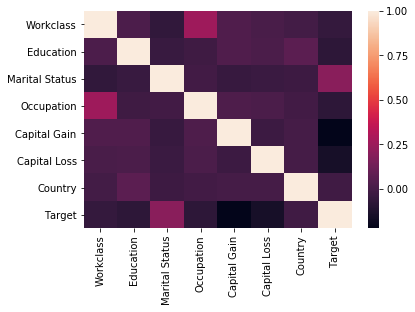

In [17]:
#plotting heat map for better evaluation of data 
sns.heatmap(data_set.corr())

In [18]:
#seeing the data set so that if any column needs re scaling
data_set.describe()

,Workclass,Education,Marital Status,Occupation,Capital Gain,Capital Loss,Country,Target
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,4.868892,11.298210,3.611836,7.572740,1077.648844,87.303830,37.718866,0.759190
std,1.455960,3.870264,1.506222,4.228857,7385.292085,402.960219,7.823782,0.427581
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,10.000000,3.000000,4.000000,0.000000,0.000000,40.000000,1.000000
50%,5.000000,12.000000,3.000000,8.000000,0.000000,0.000000,40.000000,1.000000
75%,5.000000,13.000000,5.000000,11.000000,0.000000,0.000000,40.000000,1.000000
max,9.000000,16.000000,7.000000,15.000000,99999.000000,4356.000000,42.000000,1.000000


In [19]:
# making rescaling function
def rescaling(col):
    max_value  = data_set[col].min()
    min_value  = data_set[col].max()
    data_set[col] = (data_set[col] - min_value)*10/(max_value - min_value)

In [20]:
#rescaling capital gain and capital loss column
rescaling('Capital Gain')
rescaling('Capital Loss')

In [21]:
# describing data set 
data_set.describe()

,Workclass,Education,Marital Status,Occupation,Capital Gain,Capital Loss,Country,Target
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,4.868892,11.298210,3.611836,7.572740,9.892234,9.799578,37.718866,0.759190
std,1.455960,3.870264,1.506222,4.228857,0.738537,0.925069,7.823782,0.427581
min,1.000000,1.000000,1.000000,1.000000,-0.000000,-0.000000,1.000000,0.000000
25%,5.000000,10.000000,3.000000,4.000000,10.000000,10.000000,40.000000,1.000000
50%,5.000000,12.000000,3.000000,8.000000,10.000000,10.000000,40.000000,1.000000
75%,5.000000,13.000000,5.000000,11.000000,10.000000,10.000000,40.000000,1.000000
max,9.000000,16.000000,7.000000,15.000000,10.000000,10.000000,42.000000,1.000000


### Seperating train and test data set

In [22]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set

# selecting random 0.7 fraction of dataset as train set
train = data_set.sample(frac=0.7, random_state=3)   

# chossing different random state will give different random rows
# selecting remaining i.e. 30% as test set
test = data_set.drop(train.index)  

#printing train data set shape and it's head values
print("shape of train data : ",train.shape)
train.head()

shape of train data :  (22793, 8)


,Workclass,Education,Marital Status,Occupation,Capital Gain,Capital Loss,Country,Target
17650,5,10,3,2,10.0,5.668044,40,0
1002,8,12,3,11,10.0,10.000000,40,0
11957,5,16,3,2,10.0,10.000000,40,0
4669,3,10,3,11,10.0,10.000000,40,0
28486,5,12,3,4,10.0,10.000000,40,1


In [23]:
#printing test data set shape and it's head values
print("shape of test data : ",test.shape)
test.head()

shape of test data :  (9768, 8)


,Workclass,Education,Marital Status,Occupation,Capital Gain,Capital Loss,Country,Target
2,5,12,1,7,10.000000,10.0,40,1
3,5,2,3,7,10.000000,10.0,40,1
4,5,10,3,11,10.000000,10.0,6,1
8,5,13,5,11,8.591586,10.0,40,0
10,5,16,3,5,10.000000,10.0,40,0


In [24]:
#defining a method to seperate xtrain,xtest,ytrain,ytest data since there are large number of columns
def split_train_test_x_y(data):   
    #seperating x values
    y_values = np.array(data['Target'])
    #seperating y values
    x_values = np.ones((1,len(data)))
    
    for col in data.columns:
        if col != 'Target':
            new_row = np.array(data[col]).reshape(1,len(data))
            x_values = np.append(x_values, new_row, axis=0)

    return x_values, y_values


In [25]:
#obtaining x-train,x-test,y-train,y-test values by calling above function
train_x_values, train_y_values = split_train_test_x_y(train)
test_x_values, test_y_values = split_train_test_x_y(test)

### making logistic regression model 

In [26]:
# initialising all parameters (theta0, theta1,...theta(n)) to 0 
theta = np.zeros(len(train_x_values))


# total training records
total = len(train) 

# defining prediction fn using sigmoid function using formula
def hypothesis_function(x_values):
    return 1/(1 + np.exp(-(theta.dot(x_values))))

In [27]:
# defining derivative of cost function
def cost_function(row):
    return (hypothesis_function(train_x_values) - train_y_values).dot(train_x_values[row])/total

In [43]:
def obtain_theta():
    #taking number of iterations
    iterations = 100 
    #taking learning rate
    alpha = 0.1
    for _ in range(iterations):
        theta_temp = np.copy(theta)
        for index in range(len(theta_temp)):
            theta[index] = theta_temp[index] - alpha * cost_function(index)
    return theta

In [44]:
# printing final parameters theta0,theta1,.....,theta(n)
theta = obtain_theta()
theta

array([14.46090001,  0.08267395, -0.16578343,  0.52872834,  0.02976409,
        2.57702644, -1.08573327, -0.70685   ])

In [45]:
#checking for accuracy of build model

# function that returns accuracy using total predicting correct category
def find_accuracy(predicted_y_values, y_values):
    return (categorise_prediction(predicted_y_values) == y_values).mean()*100

In [46]:
# categorising predicted values
def categorise_prediction(y_values):
    return np.where(y_values >= 0.5, 1, 0) 

In [49]:
#obtaining accuracy of build model
model_accuracy = find_accuracy(hypothesis_function(test_x_values), test_y_values)
#printing model accuracy obtained
model_accuracy

76.37182637182637